## Standardization


Standardization centers the variable at zero and standardizing the variance to 1. 

The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [4]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.86666741e+00, 2.86187016e+01, 5.42340368e+00, 1.09477484e+00,
       1.42515732e+03, 3.04051776e+00])

In [6]:
# the scaler stores the standard deviation of the features,
# learned from train set

scaler.scale_

array([1.89109236e+00, 1.25962585e+01, 2.28754018e+00, 4.52736275e-01,
       1.14954037e+03, 6.86792905e+00])

In [7]:
# Inspect the original statistical parameters

X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [8]:
# inspect the statistics after scaling

X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.007057,0.005500,0.008154,0.013991,0.000926,0.014627
std,1.015290,0.997154,1.251446,1.148474,0.949568,2.300008
min,-1.780329,-2.192612,-1.730090,-1.313734,-1.232803,-0.341909
25%,-0.695110,-0.843004,-0.441064,-0.194995,-0.547312,-0.087955
50%,-0.178240,0.030271,-0.085698,-0.101679,-0.222400,-0.031374
75%,0.477017,0.665380,0.280150,0.008082,0.262794,0.035671
max,5.887302,1.856210,59.664826,54.207251,12.944167,180.591967


In [9]:
X_train_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04
mean,8.999815e-17,-1.077027e-16,-4.873670e-16,2.564701e-16,-6.393311e-17,5.606442e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.780329e+00,-2.192612e+00,-2.000948e+00,-1.681865e+00,-1.237153e+00,-3.335092e-01
25%,-6.853538e-01,-8.430044e-01,-4.245411e-01,-1.963688e-01,-5.577510e-01,-8.929172e-02
50%,-1.732160e-01,3.027077e-02,-8.484487e-02,-1.015919e-01,-2.263142e-01,-3.263905e-02
75%,4.597515e-01,6.653800e-01,2.728762e-01,1.154128e-02,2.599671e-01,3.493450e-02
max,5.887302e+00,1.856210e+00,5.556621e+01,7.282803e+01,2.980047e+01,8.687827e+01


In [10]:
plt.rcParams.update({"font.size": 15})

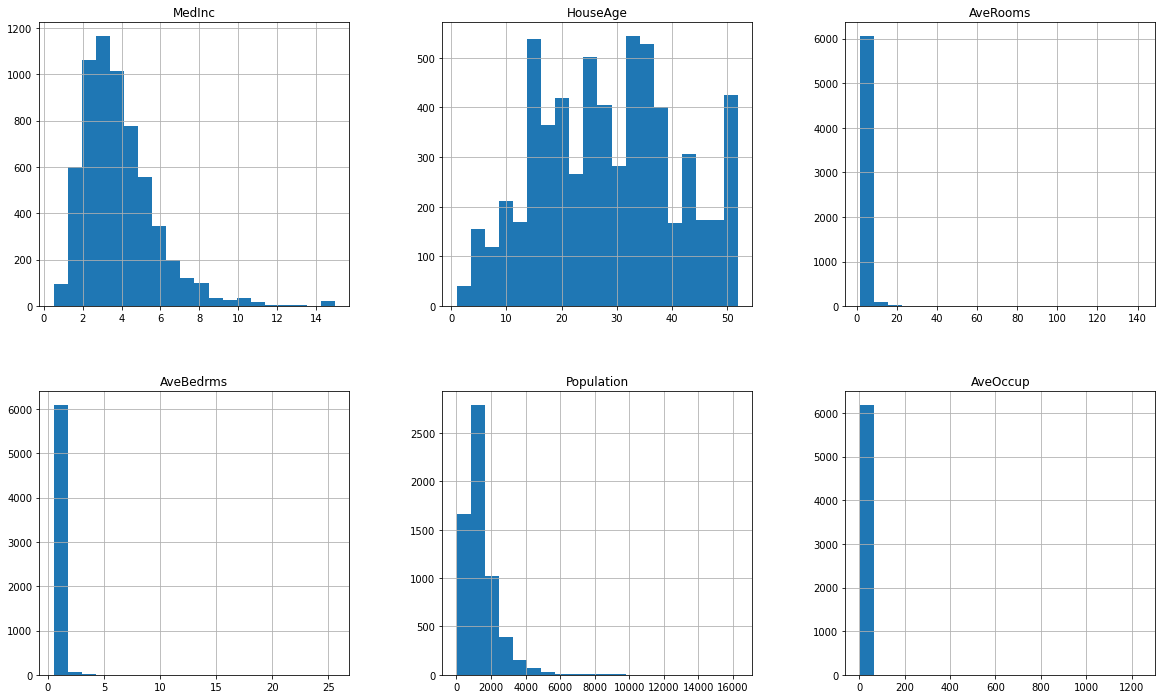

In [11]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

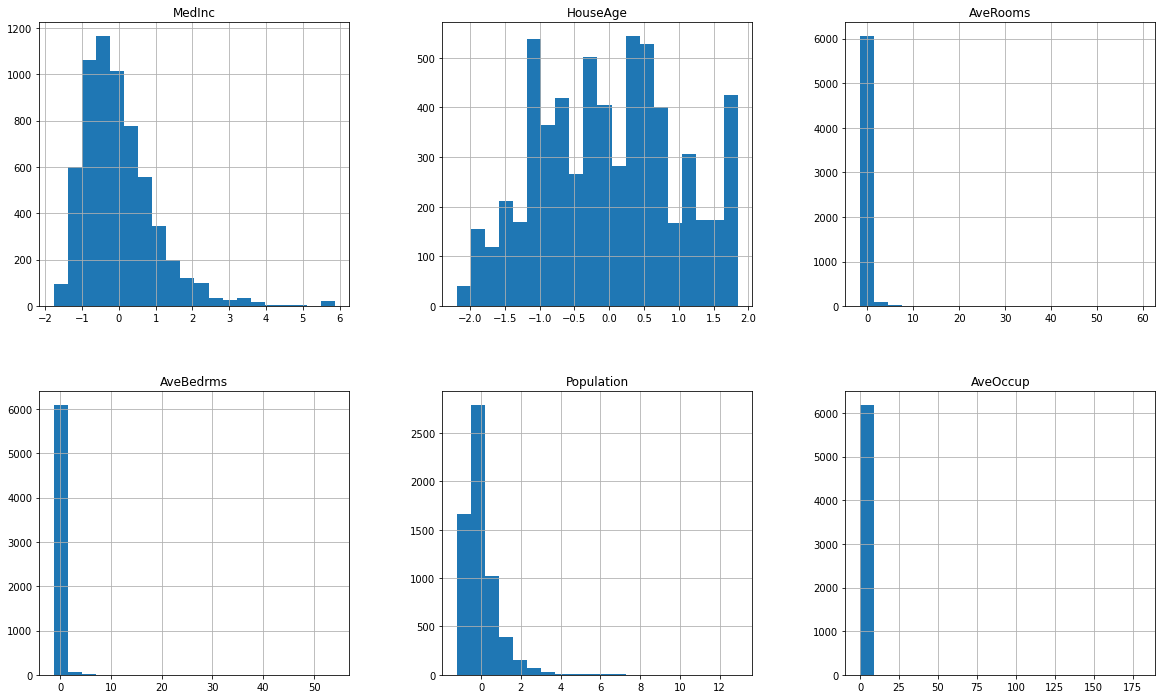

In [12]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()